# About

SHiP track pattern recognition is in this notebook.

# Data

In [1]:
import os, sys
sys.path.append('../functions')

In [2]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

In [3]:
all_mctracks = pandas.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pandas.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index

# Get reconstructible events

In [138]:
from ReconstructibleTracks import get_reconstractible_tracks

reconstructible_events = {}

for event_id in range(0, 2500):
    
    tracks = get_reconstractible_tracks(event_id, all_hits, all_mctracks, all_velo_points)
    
    if tracks != []:
        reconstructible_events[event_id] = tracks

In [154]:
reco = numpy.array(reconstructible_events.keys())
#pandas.DataFrame(reco).to_csv('./Data/reco_tracks_for_pattern_recognition.csv')
reco

array([ 513,    2,  515,  516, 1541,  518,    7,   10, 2059, 1036, 1550,
         15, 2392, 1042,  686,   23, 2360,   27, 2077, 1057,  549,   39,
       2271, 1066, 1655, 2482,  558, 2095,   48,   50, 2099,   53, 1204,
       1546,   62, 1775, 1600, 2113, 1090, 2423, 1206, 1606, 1607, 1548,
         74, 1293, 1213,   84,   85,   86, 1111, 2138, 1116, 1629,  606,
       1637,  608,   97, 1979,  612,  102,  614, 1129,  106, 1895, 2305,
       2157,  622,  957, 1136,  625, 1138, 2232, 2164, 1893, 1142, 1385,
       2493,  122, 1668,  126, 1557,  129,  642,  131,  644, 1157,  134,
        135,  648, 1280,  651, 1474,  654,  143, 1683, 2224, 1691, 1180,
        157,  670,  159, 2208,  161, 2246, 1190, 1704,  174, 1200, 1224,
        179,  692, 1717,  694,  184, 1722, 1724,  189, 2239, 1677, 1440,
        707, 2244, 1967, 1222,  712,  715, 1900,  719, 1232, 2446,  211,
       2260, 1238,  215, 2264, 1242, 1243, 1756,  221, 1758,  735,  736,
       1761, 1762, 1251,  806, 1256, 1769, 2282,  7

In [4]:
reco2 = [ 513,    2,  515,  516, 1541,  518,    7,   10, 2059, 1036, 1550,
         15, 2392, 1042,  686,   23, 2360,   27, 2077, 1057,  549,   39,
       2271, 1066, 1655, 2482,  558, 2095,   48,   50, 2099,   53, 1204,
       1546,   62, 1775, 1600, 2113, 1090, 2423, 1206, 1606, 1607, 1548,
         74, 1293, 1213,   84,   85,   86, 1111, 2138, 1116, 1629,  606]

In [5]:
import cPickle as pickle

clf_pickle2 = open('classifier_y.pkl', 'rb')
clf_y = pickle.load(clf_pickle2)
clf_pickle2.close()

clf_pickle2 = open('classifier_stereo.pkl', 'rb')
clf_stereo = pickle.load(clf_pickle2)
clf_pickle2.close()

# Stations 1&2

In [6]:
from Y_views_new2 import loop_yz_new as loop_yz
from UV_views_new2 import loop_xz

reco_events12 = {}

for event_id in reco2:
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 3, 50.7, 0, clf_y, clf_stereo, 0, event)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 3, 50, 0, clf_stereo, event)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events12[event_id] = reco
    
    print event_id, ' / ', len(reco2)

513  /  55
2  /  55
515  /  55
516  /  55
1541  /  55
518  /  55
7  /  55
10  /  55
2059  /  55
1036  /  55
1550  /  55
15  /  55
2392  /  55
1042  /  55
686  /  55
23  /  55
2360  /  55
27  /  55
2077  /  55
1057  /  55
549  /  55
39  /  55
2271  /  55
1066  /  55
1655  /  55
2482  /  55
558  /  55
2095  /  55
48  /  55
50  /  55
2099  /  55
53  /  55
1204  /  55
1546  /  55
62  /  55
1775  /  55
1600  /  55
2113  /  55
1090  /  55
2423  /  55
1206  /  55
1606  /  55
1607  /  55
1548  /  55
74  /  55
1293  /  55
1213  /  55
84  /  55
85  /  55
86  /  55
1111  /  55
2138  /  55
1116  /  55
1629  /  55
606  /  55


In [8]:
n = 0.
for i in reco2:
    if len(reco_events12[i][0].keys()) >= 2:
        n += 1.
print n/len(reco2) * 100

98.1818181818


In [38]:
all_hits.loc[reco_events12[1090][1][1]]

,Unnamed: 0,Unnamed: 0.1,Bits,TrackID,Px,Py,Pz,Time,Length,ELoss,...,PdgCode,dist2Wire,event,k,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Index
40879,40879,40879,33554432,3,0.141039,0.950012,49.510521,383.951416,0.836735,0.000004,...,13,0.250058,1090,0,1,0,0,1,209,40879
40888,40888,40888,33554432,3,0.140868,0.920450,49.510857,390.678436,0.574329,0.000003,...,13,0.393822,1090,9,2,0,1,0,206,40888
40885,40885,40885,33554432,3,0.140951,0.947202,49.510426,384.953766,0.727471,0.000004,...,13,0.324432,1090,6,1,3,0,1,209,40885
40887,40887,40887,33554432,3,0.140855,0.921242,49.510868,390.621460,0.974122,0.000002,...,13,0.018229,1090,8,2,0,0,1,207,40887
40880,40880,40880,33554432,3,0.140849,0.949814,49.510502,384.037659,0.848750,0.000003,...,13,0.239721,1090,1,1,0,1,1,209,40880
40916,40916,40916,33554432,2,-0.343170,-0.039192,29.245461,383.918274,0.601369,0.000001,...,211,0.383614,1090,37,1,0,0,0,209,40916
40896,40896,40896,33554432,3,0.141468,0.913192,49.510654,391.673187,0.920093,0.000003,...,13,0.160990,1090,17,2,3,1,0,206,40896
40895,40895,40895,33554432,3,0.141236,0.913562,49.510666,391.590057,0.723132,0.000004,...,13,0.326848,1090,16,2,3,0,0,206,40895
40886,40886,40886,33554432,3,0.141008,0.947169,49.510403,385.000183,0.959220,0.000004,...,13,0.086804,1090,7,1,3,1,0,208,40886


In [14]:
for i in reco_events12.keys():
    print reco_events12[i][0].keys(), i

[1, 2] 513
[1, 2] 2
[1, 2] 515
[1, 2] 516
[1, 2] 1541
[1, 2] 518
[1, 2] 7
[1, 2] 10
[1, 2] 2059
[1, 2] 1036
[1, 2] 1293
[1, 2] 1550
[1, 2] 15
[1, 2] 1042
[1, 2] 558
[1, 2] 23
[1, 2] 27
[1, 2] 2077
[1, 2] 1057
[1, 2] 549
[1, 2] 39
[1, 2] 1066
[1, 2] 50
[1, 2] 686
[1, 2] 2095
[1, 2] 48
[1, 2] 2482
[1, 2] 2099
[1, 2] 1204
[1, 2] 53
[1, 2, 3, 4, 5] 1206
[1, 2] 2360
[1, 2] 1546
[1, 2] 62
[1, 2] 1600
[1, 2] 2113
[1] 1090
[1, 2] 1606
[1, 2] 1607
[1, 2] 1548
[1, 2] 74
[1, 2] 2423
[1, 2] 1213
[1, 2] 84
[1, 2] 85
[1, 2] 86
[1, 2] 1111
[1, 2] 2392
[1, 2] 2138
[1, 2] 1116
[1, 2] 1629
[1, 2] 606
[1, 2] 2271
[1, 2] 1775
[1, 2] 1655


In [28]:
10001 // 10000

1

In [9]:
from efficiency import efficiency
eff_y, eff_stereo, eff_station = efficiency(reco2, 
                                            all_hits, 
                                            reco_events12)

In [12]:
numpy.array(eff_stereo).mean()

0.92692363192363181

In [18]:
for i in eff_stereo:
    if i!=1:
        print i

0.5
0.625
0.714285714286
0.769230769231


# Stations 3&4

In [40]:
from Y_views_new2 import loop_yz_new as loop_yz
from UV_views import loop_xz

reco_events34 = {}

for event_id in reco2:
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 4, 600.7, 1, clf_y, clf_stereo, 0, event)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 1)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events34[event_id] = reco
    
    print event_id, ' / ', len(reco2)

In [42]:
len(reco_events34)

54

In [43]:
for i in reco_events34.keys():
    print reco_events34[i][0].keys(), i

[1, 2] 513
[1, 2] 2
[1, 2] 515
[1, 2] 516
[1, 2] 1541
[1, 2] 518
[1, 2] 7
[1, 2] 10
[1, 2] 2059
[1, 2] 1036
[1, 2] 1293
[1, 2] 1550
[1, 2] 15
[1, 2] 1042
[1, 2] 558
[1, 2] 23
[1, 2] 27
[1, 2] 2077
[1, 2] 1057
[1, 2] 549
[1, 2] 39
[1, 2] 1066
[1, 2] 50
[1, 2] 686
[1, 2] 2095
[1, 2] 48
[1, 2] 2482
[1, 2] 2099
[1, 2] 1204
[1, 2] 53
[1, 2, 3, 4] 1206
[1, 2] 2360
[1, 2] 1546
[1, 2] 62
[1, 2] 1600
[1, 2] 2113
[1, 2] 1090
[1, 2] 1606
[1, 2, 3] 1607
[1, 2] 1548
[1] 74
[1, 2] 1213
[1, 2] 84
[1, 2] 85
[1, 2] 86
[1, 2] 1111
[1, 2] 2392
[1, 2] 2138
[1, 2] 1116
[1, 2] 1629
[1, 2] 606
[1, 2] 2271
[1, 2] 1775
[1] 1655


In [44]:
for i in reco_events34.keys():
    print reco_events34[i][2].keys(), i

[10001, 20002] 513
[10001, 20002] 2
[10001, 20002] 515
[10001, 20002] 516
[10001, 20002] 1541
[10001, 20002] 518
[10001, 10002] 7
[10001, 20002] 10
[10001, 20002] 2059
[10001, 20002] 1036
[10001, 20002] 1293
[10001, 20002] 1550
[10001, 20002] 15
[10001, 20002] 1042
[10001, 20002] 558
[10001, 20002] 23
[10001, 20002] 27
[10001, 20002] 2077
[10001, 20002] 1057
[10001, 20002] 549
[10001, 20002] 39
[10001, 20002] 1066
[10001, 20002] 50
[10001, 20002] 686
[10001, 20002] 2095
[10001, 20002] 48
[10001, 20002] 2482
[10001, 20002] 2099
[10001, 20002] 1204
[10001, 20002] 53
[10001, 20002, 30003, 40004] 1206
[10001, 20002] 2360
[10001, 20002] 1546
[10001, 20002] 62
[10001, 20002] 1600
[10001, 20002] 2113
[10001, 20002] 1090
[10001, 20002] 1606
[10001, 20002] 1607
[10001, 20002] 1548
[10001] 74
[10001, 20002] 1213
[10001, 20002] 84
[20001] 85
[10001, 20002] 86
[10001, 20002] 1111
[10001, 20002] 2392
[10001, 20002] 2138
[10001, 20002] 1116
[10001, 20002] 1629
[10001, 20002] 606
[10001, 20002] 2271


In [45]:
eff_y, eff_stereo, eff_station = efficiency(reco2, 
                                            all_hits, 
                                            reco_events34)

In [49]:
for i in eff_station:
    if i!=1:
        print i

0.6875
0.666666666667
0.888888888889


# Match tracks

In [281]:
from MatchTracks import get_matched_tracks

match_tracks, dist_y, dist_x = get_matched_tracks(reco_events12, reco_events34)

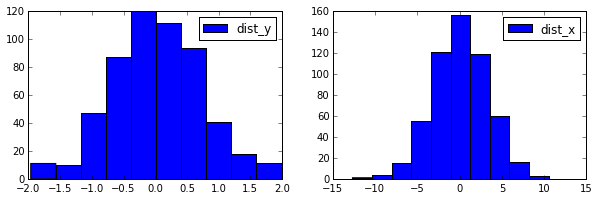

In [282]:
plt.figure(figsize=(10, 3))

plt.subplot(1,2,1)
dist_y = numpy.array(dist_y)
plt.hist(dist_y, label='dist_y', bins=10)
plt.legend(loc='best')


plt.subplot(1,2,2)
dist_x = numpy.array(dist_x)
plt.hist(dist_x, label='dist_x', bins=10)
plt.legend(loc='best')

plt.show()

# Efficiency

### Stations 1&2

In [143]:
from efficiency import efficiency

eff_y, eff_stereo, eff_station = efficiency(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events12)

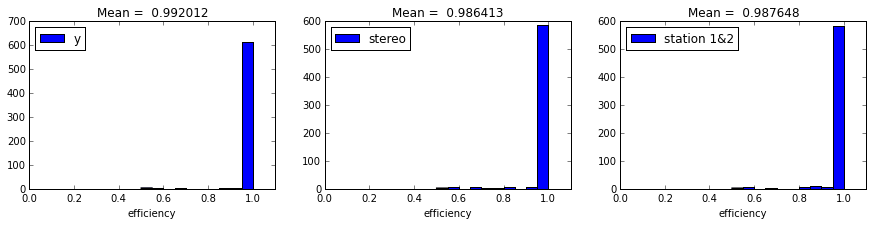

In [144]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

### Stations 3&4

In [145]:
from efficiency import efficiency

eff_y, eff_stereo, eff_station = efficiency(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events34)

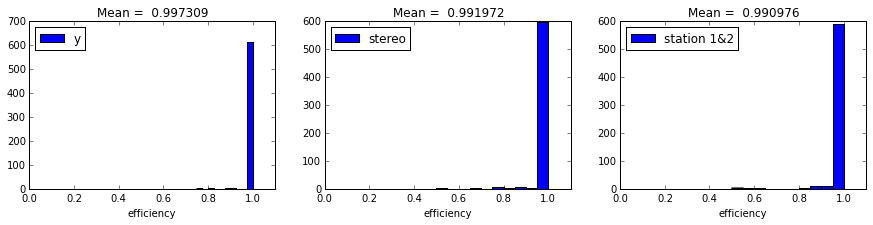

In [146]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

# Efficiency per event

In [229]:
def get_track_eff(inds):
    
    unique, counts = numpy.unique(all_hits.loc[inds].TrackID.values, return_counts=True)
    unique2, counts2 = numpy.unique(all_hits.loc[inds].PdgCode.values, return_counts=True)
    
    track_id = unique[counts == counts.max()][0]
    pdg = numpy.abs(unique2[counts2 == counts2.max()][0])
    
    return {track_id: pdg}

In [209]:
tracks_y[1].values()[0]

1

In [283]:
n_reco_events = len(reconstructible_events.keys())

n_events_y_12 = 0
n_events_stereo_12 = 0
n_events_station_12 = 0

n_events_y_34 = 0
n_events_stereo_34 = 0
n_events_station_34 = 0

n_events_combined_12_34 = 0
n_events_matched = 0


passed_event_ids = []

# y_12
for event_id in reconstructible_events.keys():
    
    tracks_y = reco_events12[event_id][0]
    
    if len(tracks_y) > 1:
        n_events_y_12 += 1.
        passed_event_ids.append(event_id)

# stereo_12
reco_events = passed_event_ids
passed_event_ids = []

for event_id in reco_events:
    
    tracks_stsreo = reco_events12[event_id][2]
    
    if len(tracks_stsreo) > 1:
        n_events_stereo_12 += 1.
        passed_event_ids.append(event_id)
        
# station_12
n_events_station_12 = n_events_stereo_12

# y_34
reco_events = passed_event_ids
passed_event_ids = []

for event_id in reco_events:
    
    tracks_stsreo = reco_events34[event_id][0]
    
    if len(tracks_stsreo) > 1:
        n_events_y_34 += 1.
        passed_event_ids.append(event_id)
        
# stereo_34
reco_events = passed_event_ids
passed_event_ids = []

for event_id in reco_events:
    
    tracks_stsreo = reco_events34[event_id][2]
    
    if len(tracks_stsreo) > 1:
        n_events_stereo_34 += 1.
        passed_event_ids.append(event_id)
        
# station_34
n_events_station_34 = n_events_stereo_34


# combine 1&2/3&4
reco_events = passed_event_ids
passed_event_ids = []

for event_id in reco_events:
    
    track_comb = match_tracks[event_id]
    
    if len(track_comb) != 0:
        n_events_combined_12_34 += 1
        passed_event_ids.append(event_id)
        

# matched
reco_events = passed_event_ids
passed_event_ids = []

for event_id in reco_events:
    
    track_comb = match_tracks[event_id]
    
    if len(track_comb) > 1:
        n_events_matched += 1
        passed_event_ids.append(event_id)

Total efficiency per track is  76.7295597484  %


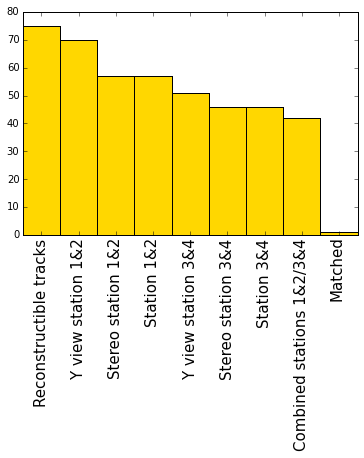

In [284]:
n_events = [n_reco_events, 
            n_events_y_12, 
            n_events_stereo_12, 
            n_events_station_12, 
            n_events_y_34, 
            n_events_stereo_34,
            n_events_station_34,
            n_events_combined_12_34,
            n_events_matched]

n_events = numpy.array(n_events)

labels = ['Reconstructible tracks', 
          'Y view station 1&2', 
          'Stereo station 1&2', 
          'Station 1&2',
          'Y view station 3&4', 
          'Stereo station 3&4',
          'Station 3&4',
          'Combined stations 1&2/3&4',
          'Matched']

print 'Total efficiency per track is ', 1. * n_events_matched / n_reco_events * 100., ' %'

x = range(len(labels))
#plt.figure(figsize=(15,5))
plt.bar(x, n_events - n_events.min() + 1., width=1., color='gold', align='center')
plt.xticks(x, labels, rotation=90, size=15)
plt.xlim(-0.5, 8.5)
plt.show()

In [285]:
n_events

array([ 318.,  313.,  300.,  300.,  294.,  289.,  289.,  285.,  244.])